In [81]:
import pandas as pd
import sklearn as sk
import statsmodels as sm 
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split, LeaveOneOut, cross_val_score
from sklearn.linear_model import LogisticRegression, LinearRegression

from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
import seaborn as sns

sns.set()

In [53]:
df = pd.read_csv("Default.csv", index_col=0)


1.
1a.


In [54]:
y = df['default']
X = df[['income', 'balance']]
clf = LogisticRegression(random_state=0).fit(X, y)
clf.coef_

array([[2.08091984e-05, 5.64710797e-03]])

1b.

In [55]:
#split into train and validation set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=200)

#fit with traing data
clf.fit(X_train, y_train)

#posterior probability threshold of 0.5 and compute validation set accuracy
#clf.score gives us the accuracy, so 1-score is the error, or misclassifications
1- clf.score(X_test, y_test)

0.026000000000000023

there is a 2.6% misclassification rate, or validation set error.

1c.

In [56]:
for i in range(3):
    #split into train and validation set
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=250+i)

    #fit with traing data
    clf.fit(X_train, y_train)

    #posterior probability threshold of 0.5 and compute validation set accuracy
    #clf.score gives us the accuracy, so 1-score is the error, or misclassifications
    print(1- clf.score(X_test, y_test))

0.03159999999999996
0.026000000000000023
0.031200000000000006


using three different 75-25 splits, our validation set error remained relatively low, with the error of each split being aroudn 2.8 or 3.0 

1d.

In [57]:
stud = df['student'].eq('Yes').mul(1)
X = df[['income', 'balance']]
X['student'] = stud

with_stud = []
without_stud = []
for i in range(75):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 200+i)

    #with student
    clf.fit(X_train, y_train)
    with_stud.append(1- clf.score(X_test, y_test))

    #without student
    clf.fit(X_train.drop(['student'], axis =1), y_train)
    without_stud.append(1- clf.score(X_test.drop(['student'], axis=1), y_test))
print("Mean error with stud: {}".format(sum(with_stud)/len(with_stud)))
print("Mean error without stud: {}".format(sum(without_stud)/len(without_stud)))


    

C:\Users\Bernhard\AppData\Local\Temp\ipykernel_97048\568021069.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['student'] = stud


Mean error with stud: 0.03240533333333334
Mean error without stud: 0.030437333333333344


From this, we can see that adding a student dummy variable does not reduce the erorr rate of our logisitic regression, and in fact increases the average error rate for our logisitc regression by around 0.2%

2.
2a.

In [73]:
np.random.seed(312)
X = np.random.normal(size=100)
y = X-2*X**2+np.random.normal(size=100)


<p>In this dataset, n is 100, and p is 1. The model used ot generate the data in equation form is Y = x-2x<sup>2</sup> + &#949</p>

2b.

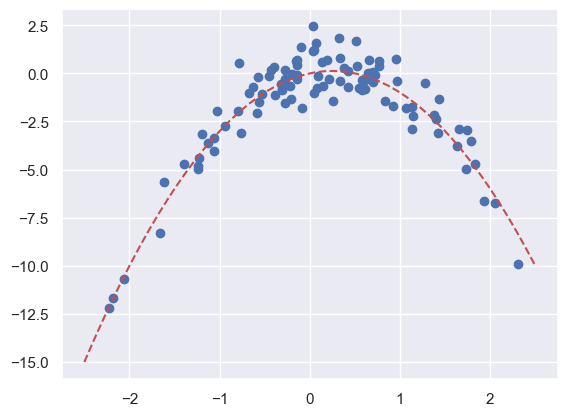

In [74]:
plt.scatter(X, y)

x_predict=np.linspace(-2.5,2.5)
y_predict=x_predict-2*x_predict**2
plt.plot(x_predict,y_predict, 'r--')

I find that there is noise especially around the vertex of the parabola for the model of the equation y, but the scatterplot is mostly parabolic

2c.

In [85]:
np.random.seed(312)
loocv_scores = pd.Series()
loo = LeaveOneOut()
loo.get_n_splits(X)
for i in range(4):
    poly_reg = Pipeline([("poly", PolynomialFeatures(degree = i+1)), ("reg", LinearRegression())])
    loo = LeaveOneOut()
    cv_scores = cross_val_score(poly_reg, X.reshape(-1, 1), y, scoring = "neg_mean_squared_error", cv = loo)
    loocv_scores.loc[i] = abs(cv_scores.mean())
loocv_scores

C:\Users\Bernhard\AppData\Local\Temp\ipykernel_97048\4121776894.py:2: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  loocv_scores = pd.Series()


0    8.015655
1    0.807797
2    0.823459
3    0.827053
dtype: float64

<p>for the linear model Y= &#946<sub>0</sub> + &#946<sub>1</sub>X + &#949 we get 8.016 as the LOOCV error.<p>
<p>for the linear model Y= &#946<sub>0</sub> + &#946<sub>1</sub>X + &#946<sub>2</sub>X<sup>2</sup> + &#949 we get 0.0808 as the LOOCV error.<p>
<p>for the linear model Y= &#946<sub>0</sub> + &#946<sub>1</sub>X + &#946<sub>2</sub>X<sup>2</sup> +  &#946<sub>3</sub>X<sup>3</sup> + &#949 we get 0.0823 as the LOOCV error.<p>
<p>for the linear model Y= &#946<sub>0</sub> + &#946<sub>1</sub>X + &#946<sub>2</sub>X<sup>2</sup> +  &#946<sub>3</sub>X<sup>3</sup> +  &#946<sub>4</sub>X<sup>4</sup> + &#949 we get 0.0827 as the LOOCV error.<p>


2d.

<p>The model Y= &#946<sub>0</sub> + &#946<sub>1</sub>X + &#946<sub>2</sub>X<sup>2</sup> + &#949 had the lowest LOOCV error. This is what I expected, as the original model was formed off of the equation Y = x-2x<sup>2</sup> + &#949 which is best modeled by the second order polynomial equation that performed the best.</p>